# Data Space Report


<img src="images/polito_logo.png" alt="Polito Logo" style="width: 200px;"/>


## Pittsburgh Bridges Data Set

<img src="images/andy_warhol_bridge.jpg" alt="Andy Warhol Bridge" style="width: 200px;"/>

    Andy Warhol Bridge - Pittsburgh.

Report created by Student Francesco Maria Chiarlo s253666, for A.A 2019/2020.

**Abstract**:The aim of this report is to evaluate the effectiveness of distinct, different statistical learning approaches, in particular focusing on their characteristics as well as on their advantages and backwards when applied onto a relatively small dataset as the one employed within this report, that is Pittsburgh Bridgesdataset.

**Key words**:Statistical Learning, Machine Learning, Bridge Design.

## TOC:
* [Imports Section](#imports-section)
* [Dataset's Attributes Description](#attributes-description)
* [Data Preparation and Investigation](#data-preparation)
* [Learning Models](#learning-models)
* [Improvements and Conclusions](#improvements-and-conclusions)
* [References](#references)

### Imports Section <a class="anchor" id="imports-section"></a>

In [1]:
# =========================================================================== #
# STANDARD IMPORTS
# =========================================================================== #
print(__doc__)

# Critical Imports
# --------------------------------------------------------------------------- #
import warnings; warnings.filterwarnings("ignore")

# Imports through 'from' syntax
# --------------------------------------------------------------------------- #
from pprint import pprint
from IPython.display import display
from itertools import islice

# Standard Imports
# --------------------------------------------------------------------------- #
import copy; import os
import sys; import time
import itertools

# Imports through 'as' syntax
# --------------------------------------------------------------------------- #
import numpy as np; import pandas as pd

# Imports for handling graphics
# --------------------------------------------------------------------------- #
%matplotlib inline
# Matplotlib pyplot provides plotting API
import matplotlib as mpl
from matplotlib import pyplot as plt
import chart_studio.plotly.plotly as py
import seaborn as sns;  sns.set(style="ticks", color_codes=True) # sns.set()

Automatically created module for IPython interactive environment


In [2]:
# =========================================================================== #
# UTILS IMPORTS (Done by myself)
# =========================================================================== #
from utils.load_dataset_pittsburg_utils import load_brdiges_dataset
from utils.utilities_functions import *
from utils.display_utils import *
from utils.preprocessing_utils import *
from utils.training_utils import *
from utils.sklearn_functions_custom import *
from utils.training_utils_v2 import fit_by_n_components, fit_all_by_n_components, grid_search_all_by_n_components

In [3]:
# =========================================================================== #
# sklearn IMPORT
# =========================================================================== #
from sklearn.decomposition import PCA, KernelPCA

# Import scikit-learn classes: models (Estimators).
from sklearn.naive_bayes import GaussianNB           # Non-parametric Generative Model
from sklearn.naive_bayes import MultinomialNB        # Non-parametric Generative Model
from sklearn.linear_model import LinearRegression    # Parametric Linear Discriminative Model
from sklearn.linear_model import LogisticRegression  # Parametric Linear Discriminative Model
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC                          # Parametric Linear Discriminative "Support Vector Classifier"
from sklearn.tree import DecisionTreeClassifier      # Non-parametric Model
from sklearn.ensemble import BaggingClassifier       # Non-parametric Model (Meta-Estimator, that is, an Ensemble Method)
from sklearn.ensemble import RandomForestClassifier  # Non-parametric Model (Meta-Estimator, that is, an Ensemble Method)

In [4]:
# =========================================================================== #
# READ INPUT DATASET
# =========================================================================== #

dataset_path = 'C:\\Users\\Francesco\Documents\\datasets\\pittsburgh_dataset'
dataset_name = 'bridges.data.csv'

TARGET_COL = 'T-OR-D'  # Target variable name
dataset, feature_vs_values = load_brdiges_dataset(dataset_path, dataset_name)
feature_vs_values

{'RIVER': {'A': 1, 'M': 2, 'O': 3, 'Y': 4},
 'PURPOSE': {'AQUEDUCT': 1, 'HIGHWAY': 2, 'RR': 3},
 'CLEAR-G': {'G': 1, 'N': 2},
 'T-OR-D': {'DECK': 1, 'THROUGH': 2},
 'MATERIAL': {'IRON': 1, 'STEEL': 2, 'WOOD': 3},
 'SPAN': {'LONG': 1, 'MEDIUM': 2, 'SHORT': 3},
 'REL-L': {'F': 1, 'S': 2, 'S-F': 3},
 'TYPE': {'ARCH': 1,
  'CANTILEV': 2,
  'CONT-T': 3,
  'SIMPLE-T': 4,
  'SUSPEN': 5,
  'WOOD': 6}}

In [5]:
# sns.pairplot(dataset, hue='T-OR-D', size=1.5)

{'A': 1, 'M': 2, 'O': 3, 'Y': 4}
1    35
2    25
3    10
Name: RIVER, dtype: int64
['A', 'M', 'O']
            A     M     O
DECK      8.0   5.0   NaN
THROUGH  27.0  20.0  10.0
   DECK  THROUGH
A   8.0     27.0
M   5.0     20.0
O   NaN     10.0


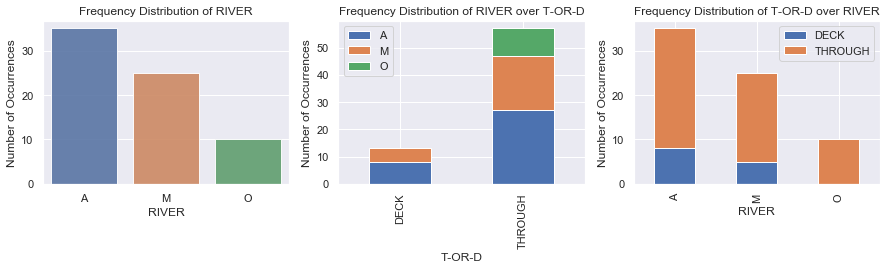

In [6]:
columns_2_avoid = ['ERECTED', 'LENGTH', 'LOCATION']

show_frequency_distribution_predictor(dataset, predictor_name='RIVER', columns_2_avoid=columns_2_avoid,
                                      features_vs_values=feature_vs_values, hue=TARGET_COL, verbose=1)

{'DECK': 1, 'THROUGH': 2}
2    57
1    13
Name: T-OR-D, dtype: int64
['THROUGH', 'DECK']


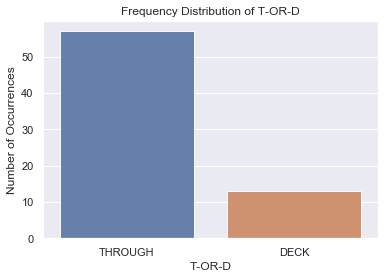

In [7]:
# show_frequency_distribution_predictors(dataset, columns_2_avoid)
show_frequency_distribution_predictor(dataset, predictor_name='T-OR-D', columns_2_avoid=columns_2_avoid,
                                      features_vs_values=feature_vs_values, hue=None, verbose=1)

{'G': 1, 'N': 2}
1    52
2    18
Name: CLEAR-G, dtype: int64
['G', 'N']


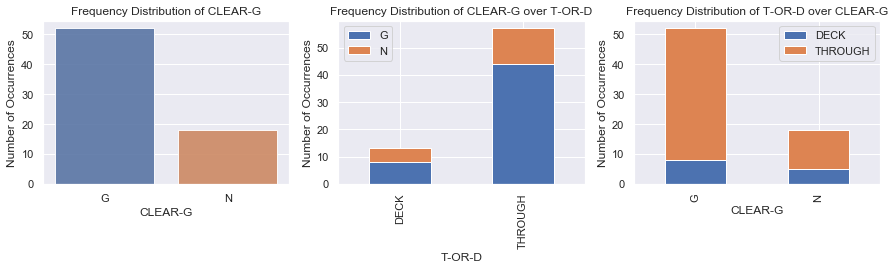

In [8]:
# show_frequency_distribution_predictors(dataset, columns_2_avoid)
show_frequency_distribution_predictor(dataset, predictor_name='CLEAR-G', columns_2_avoid=columns_2_avoid,
                                      features_vs_values=feature_vs_values, hue=TARGET_COL)

{'LONG': 1, 'MEDIUM': 2, 'SHORT': 3}
2    38
1    25
3     7
Name: SPAN, dtype: int64
['MEDIUM', 'LONG', 'SHORT']


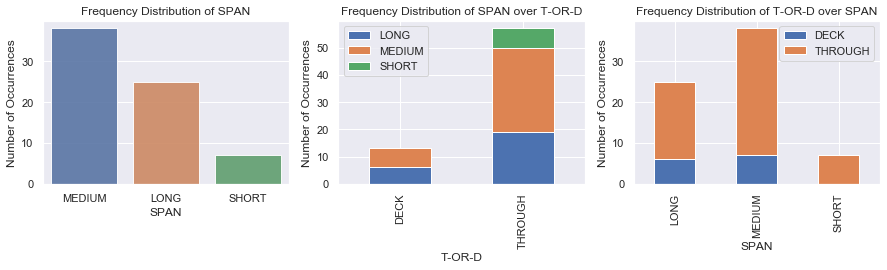

In [9]:
# show_frequency_distribution_predictors(dataset, columns_2_avoid)
show_frequency_distribution_predictor(dataset, predictor_name='SPAN', columns_2_avoid=columns_2_avoid,
                                      features_vs_values=feature_vs_values, hue=TARGET_COL)

{'IRON': 1, 'STEEL': 2, 'WOOD': 3}
2    57
3     9
1     4
Name: MATERIAL, dtype: int64
['STEEL', 'WOOD', 'IRON']


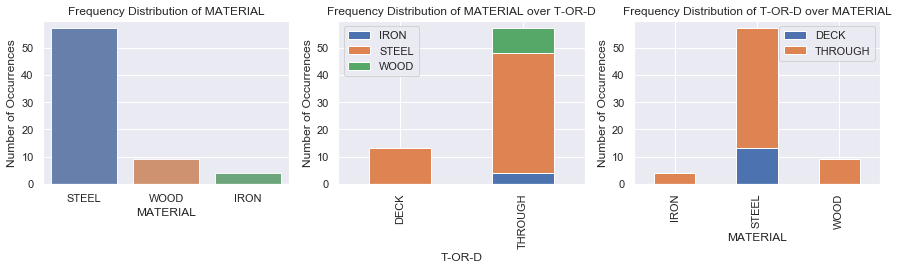

In [10]:
# show_frequency_distribution_predictors(dataset, columns_2_avoid)
show_frequency_distribution_predictor(dataset, predictor_name='MATERIAL', columns_2_avoid=columns_2_avoid,
                                      features_vs_values=feature_vs_values, hue=TARGET_COL)

{'F': 1, 'S': 2, 'S-F': 3}
1    34
2    21
3    15
Name: REL-L, dtype: int64


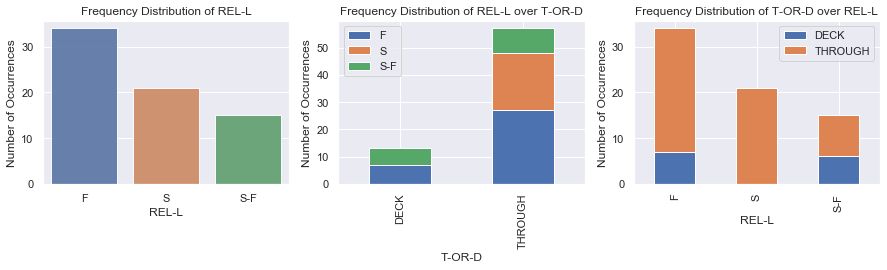

In [11]:
# show_frequency_distribution_predictors(dataset, columns_2_avoid)
show_frequency_distribution_predictor(dataset, predictor_name='REL-L', columns_2_avoid=columns_2_avoid,
                                      features_vs_values=feature_vs_values, hue=TARGET_COL)

{'ARCH': 1, 'CANTILEV': 2, 'CONT-T': 3, 'SIMPLE-T': 4, 'SUSPEN': 5, 'WOOD': 6}
4    23
1    11
3    10
2    10
6     9
5     7
Name: TYPE, dtype: int64


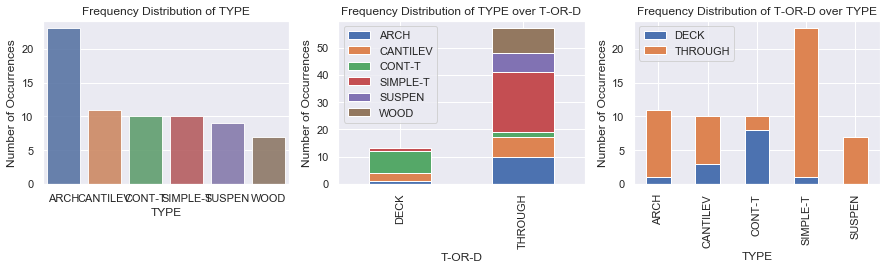

In [12]:
# show_frequency_distribution_predictors(dataset, columns_2_avoid)
show_frequency_distribution_predictor(dataset, predictor_name='TYPE', columns_2_avoid=columns_2_avoid,
                                      features_vs_values=feature_vs_values, hue=TARGET_COL)

### Correlation Matrix Analysis

In [ ]:
corr_result = dataset.corr()
display_heatmap(corr_result)

In [ ]:
show_pie_charts_corr_matrix(corr_result)

In [ ]:
feature = "PURPOSE"
dataset[[TARGET_COL, feature]].groupby([feature, TARGET_COL]).count()

In [ ]:
dataset[[TARGET_COL, feature]].groupby([feature]).count()

In [ ]:
dataset[[TARGET_COL, feature]].groupby([feature])[TARGET_COL].plot(kind = 'hist', stacked=True)

In [ ]:
dataset.pivot(columns=TARGET_COL)[feature].plot(kind = 'hist', stacked=True)

In [ ]:
show_full_stacktrace_error = True
try:
    g = sns.PairGrid(dataset)
    g.map_upper(plt.scatter)
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, lw=3, legend=False);
except Exception as err:
    if show_full_stacktrace_error is True:
        raise err
    else:
        print(str(err))
    pass

In [ ]:
g = sns.PairGrid(dataset)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

In [ ]:

show_full_stacktrace_error = True
try:
    g = sns.pairplot(dataset, hue=TARGET_COL, palette="Set2", diag_kind="kde", height=2.5)
except Exception as err:
    if show_full_stacktrace_error is True:
        raise err
    else:
        print(str(err))
    pass

In [ ]:
g = sns.PairGrid(dataset, hue=TARGET_COL)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();